# I. Data Introduction

### 1.1 Handle missing value

#### 1.1.1 Remove columns that have more than 30% missing values

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
path = "diabetic_data.csv"
df = pd.read_csv(path, keep_default_na=False)
diabete = df.copy()

There are some ? represent for missing data in the dataset. In order to make it easier for EDA steps later on when we need to fill in the missing data, we need to replace ? with NaN.

In [3]:
diabete.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabete = diabete.replace("?",np.nan)
diabete.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO


In [5]:
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
number_nan = diabete.isnull().sum()
pct_nan = (number_nan/len(diabete))*100
ranked_columns = pct_nan.sort_values(ascending=False)
ranked_columns.head(10)

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
encounter_id          0.000000
tolazamide            0.000000
glyburide             0.000000
dtype: float64

**Weight, payer_code, medical_specialty** missing the most of the data. As if data is missing > 50% the prediction will be negatively affected, for example the machine learning will learn to predict better on the majority side hence losing its accuracy when generalize it with new data sets. Therefore, we will remove those 3 columns.

In [7]:
diabete = diabete.drop(columns=['weight', 'payer_code', 'medical_specialty'])
diabete.shape

(101766, 47)

#### 1.1.2 Remove values when missing less than 5%

There are 3 columns that have less than 5% of missing values: race, diag3, diag2, diag1 so we will deal with it differently.

- race (nominal categorical): 2 biggest portions of race are Caucasian and AfricanAmerican which took over 94%, rest are 6% where as 2% that are missing. To simplify the data, we can group all the minority and the missing value as Other races.

In [8]:
#Race percentage:
diabete['race'].value_counts()/len(diabete)*100

Caucasian          74.778413
AfricanAmerican    18.876639
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: race, dtype: float64

In [9]:
diabete['race'].fillna('Unknown', inplace=True) #fill missing value with 'Unknown'
diabete['race'] = diabete['race'].replace(['Hispanic', 'Other', 'Asian', 'Unknown'], 'Other races') #Group the minorities as 'Other races'
diabete['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Other races         6457
Name: race, dtype: int64

- diag_3, diag_2, diag_1 has low % of missing values that we can drop those missing observation it will not cause big impact.

In [10]:
diabete[['diag_3','diag_2','diag_1']]


,diag_3,diag_2,diag_1
0,NaN,NaN,250.83
1,255,250.01,276
2,V27,250,648
3,403,250.43,8
4,250,157,197
...,...,...,...
101761,458,291,250.13
101762,787,276,560
101763,296,590,38
101764,998,285,996


In [11]:
diabete = diabete.dropna(subset=['diag_3','diag_2','diag_1'])
diabete[['diag_3','diag_2','diag_1']].isnull().sum() #to crosscheck if any nan left

diag_3    0
diag_2    0
diag_1    0
dtype: int64

### 1.2 Remove duplicated encounter

In [12]:
# Check if encounter_id and patient_id has any duplicated values, as assume we should have unique value
encounter_id_duplicates = diabete['encounter_id'].duplicated().any()

# Check for duplicates in the 'patient_nbr' column
patient_nbr_duplicates = diabete['patient_nbr'].duplicated().any()

# Print the results
print(f"Duplicates in 'encounter_id': {encounter_id_duplicates}")
print(f"Duplicates in 'patient_nbr': {patient_nbr_duplicates}")


Duplicates in 'encounter_id': False
Duplicates in 'patient_nbr': True


As above, we have unique encounter but duplicated number of patient, that means 1 patient can visit the hospital multiple times. Since the purpose is to identify the likelihood of re-admission, we then will keep the first time admission only in this report.

In [13]:
# Sort by 'patient_nbr' and 'encounter_id' to have the smallest 'encounter_id' first
diabete = diabete.sort_values(by=['patient_nbr', 'encounter_id'])

# Keep the first occurrence of each 'patient_nbr' (smallest 'encounter_id' due to sorting)
diabete = diabete.drop_duplicates(subset='patient_nbr', keep='first')

# Recheck duplicate value in patient_nbr column
diabete['patient_nbr'].duplicated().any()


False

Then I also remove these 2 columns that are not useful to use in the model, it was mostly use to uniquely identify the patient/ transactions.

* encounter_id
* patient_nbr

In [14]:
diabete = diabete.drop(['encounter_id', 'patient_nbr'], axis=1)

In [15]:
diabete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70416 entries, 4267 to 96147
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      70416 non-null  object
 1   gender                    70416 non-null  object
 2   age                       70416 non-null  object
 3   admission_type_id         70416 non-null  int64 
 4   discharge_disposition_id  70416 non-null  int64 
 5   admission_source_id       70416 non-null  int64 
 6   time_in_hospital          70416 non-null  int64 
 7   num_lab_procedures        70416 non-null  int64 
 8   num_procedures            70416 non-null  int64 
 9   num_medications           70416 non-null  int64 
 10  number_outpatient         70416 non-null  int64 
 11  number_emergency          70416 non-null  int64 
 12  number_inpatient          70416 non-null  int64 
 13  diag_1                    70416 non-null  object
 14  diag_2             

### 1.3 Checking Outliner


There are 3 columns which are categorical data but are input as numberical, so I will change it to be factor and replace the iteger with coresponding value first.

In [16]:
diabete.loc[:, 'admission_type_id'] = diabete['admission_type_id'].astype('category')
diabete.loc[:, 'discharge_disposition_id'] = diabete['discharge_disposition_id'].astype('category')
diabete.loc[:, 'admission_source_id'] = diabete['admission_source_id'].astype('category')

In [17]:
# Identify numerical features
int64_columns = diabete.select_dtypes(include=['int64']).columns
print(int64_columns)


Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')


In [18]:
outliner_columns = diabete[['time_in_hospital', 
                            'num_lab_procedures', 'num_procedures', 'num_medications',
                            'number_outpatient', 'number_emergency', 'number_inpatient',
                            'number_diagnoses']]

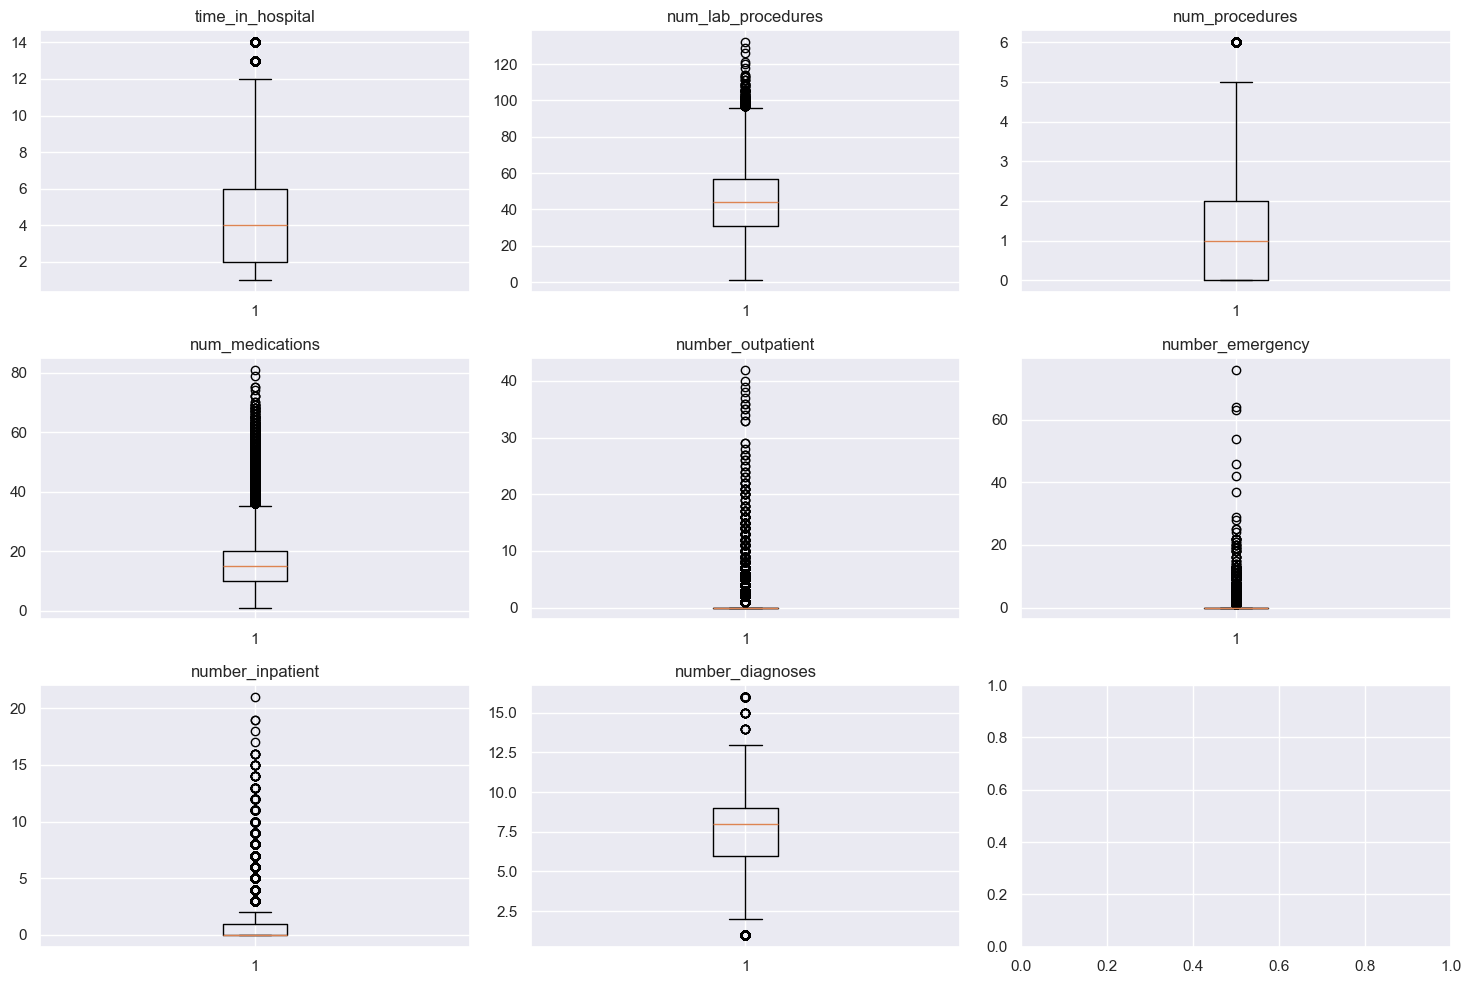

In [19]:
# Plotting boxplot for numerical columns
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()

for i, column in enumerate(outliner_columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

There are no outliners found but we noticed 3 columns number of emergency, number of inpatient and number of outpatient has majority data (>88%) fall under 1 type of observation only. Let slide down the data to see whether it play any important role in readmission rate or not.

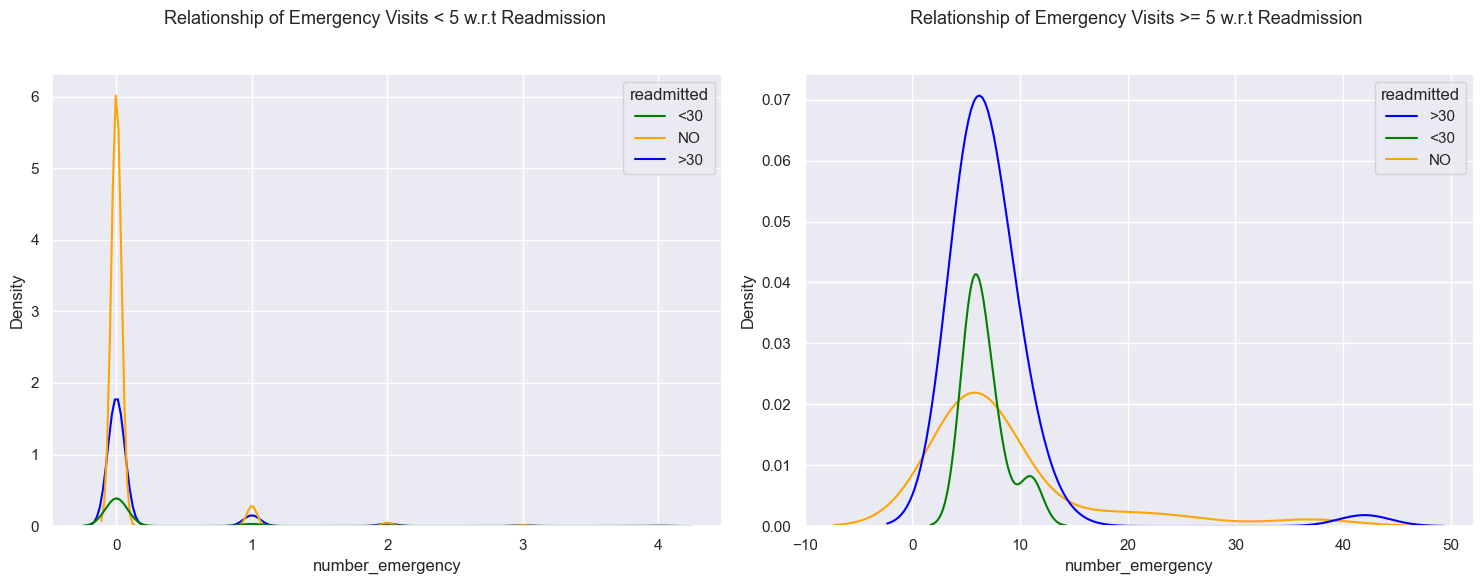

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
colors1 = {'NO': 'orange', '>30': 'blue', '<30': 'green'}

# Plot first subplot
sns.kdeplot(data=diabete.loc[diabete['number_emergency'] < 5], x="number_emergency", hue='readmitted', palette= colors1,ax=axs[0])
axs[0].set_title('Relationship of Emergency Visits < 5 w.r.t Readmission \n\n', size=13)

# Plot second subplot
sns.kdeplot(data=diabete.loc[diabete['number_emergency'] >= 5], x="number_emergency", hue='readmitted', palette= colors1, ax=axs[1])
axs[1].set_title('Relationship of Emergency Visits >= 5 w.r.t Readmission \n\n', size=13)

plt.tight_layout()
plt.show()


**Observation**

When patient never have any emergency scenario, likely they are not to be readmitted to the hospital afterward. On the oher hands, when number of emergency are more than 5 times, the chances they will be readmitted is much higher. Because of this, I would keep number_emergency in the model.

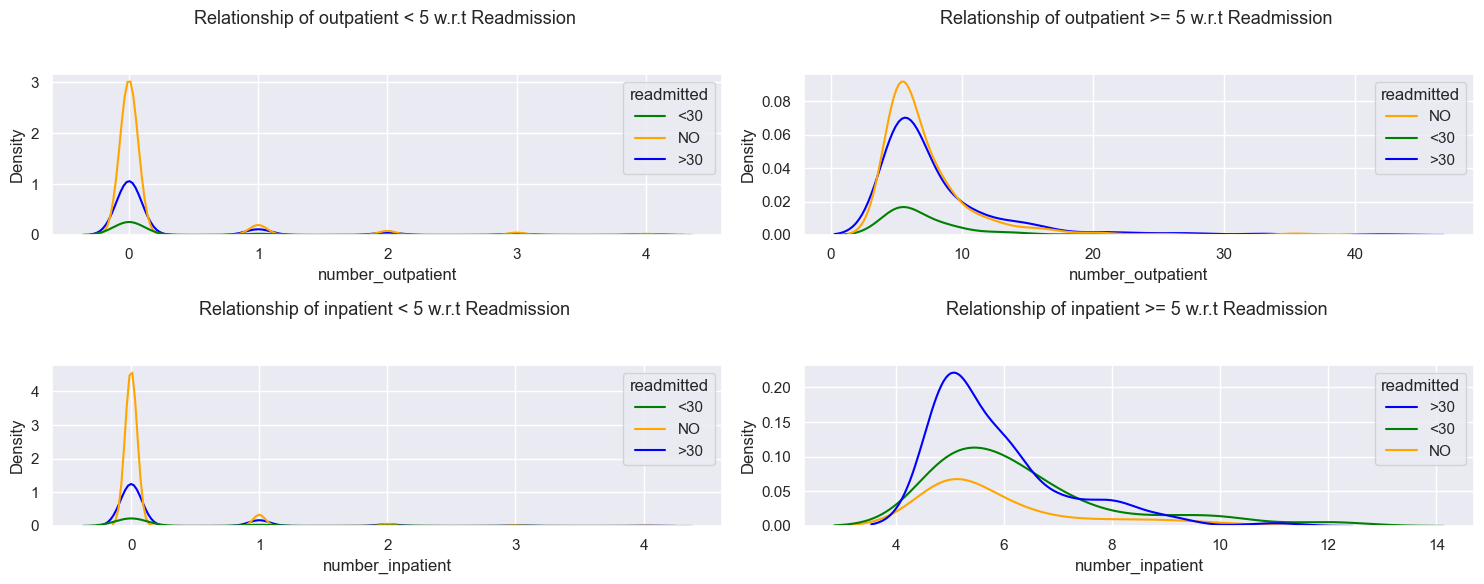

In [21]:
# Number of Outpatient and Inpatient and the relation with Readmission

import seaborn as sns
import matplotlib.pyplot as plt


# Create a figure with two subplots
fig, axs = plt.subplots(2,2, figsize=(15, 6))
colors = {'NO': 'orange', '>30': 'blue', "<30": 'green'}

# Outpatient
sns.kdeplot(data=diabete.loc[diabete['number_outpatient'] < 5], x="number_outpatient", hue='readmitted', palette= colors, ax=axs[0, 0])
axs[0, 0].set_title('Relationship of outpatient < 5 w.r.t Readmission \n\n', size=13)
sns.kdeplot(data=diabete.loc[diabete['number_outpatient'] >= 5], x="number_outpatient", hue='readmitted', palette= colors, ax=axs[0, 1])
axs[0, 1].set_title('Relationship of outpatient >= 5 w.r.t Readmission \n\n', size=13)

# Inpatient
sns.kdeplot(data=diabete.loc[diabete['number_inpatient'] < 5], x="number_inpatient", hue='readmitted', palette= colors, ax=axs[1, 0])
axs[1, 0].set_title('Relationship of inpatient < 5 w.r.t Readmission \n\n', size=13)
sns.kdeplot(data=diabete.loc[diabete['number_inpatient'] >= 5], x="number_inpatient", hue='readmitted', palette= colors, ax=axs[1, 1])
axs[1, 1].set_title('Relationship of inpatient >= 5 w.r.t Readmission \n\n', size=13)

plt.tight_layout()
plt.show()

**Observation**

The trend for number of inpatientis likely the same with number of emergency visits.
However, for number of outpatient around 5 - 10 times, the chance of getting readmitted more than 30 days and not re-admitting are somehow equal for the patients.
We can see there are some relations between those 3 columns with readmission rate especially when we slide out the data to be different group, hence, we will keep those 3 columns for model selection later on.

### 1.4 Check multicollinearity

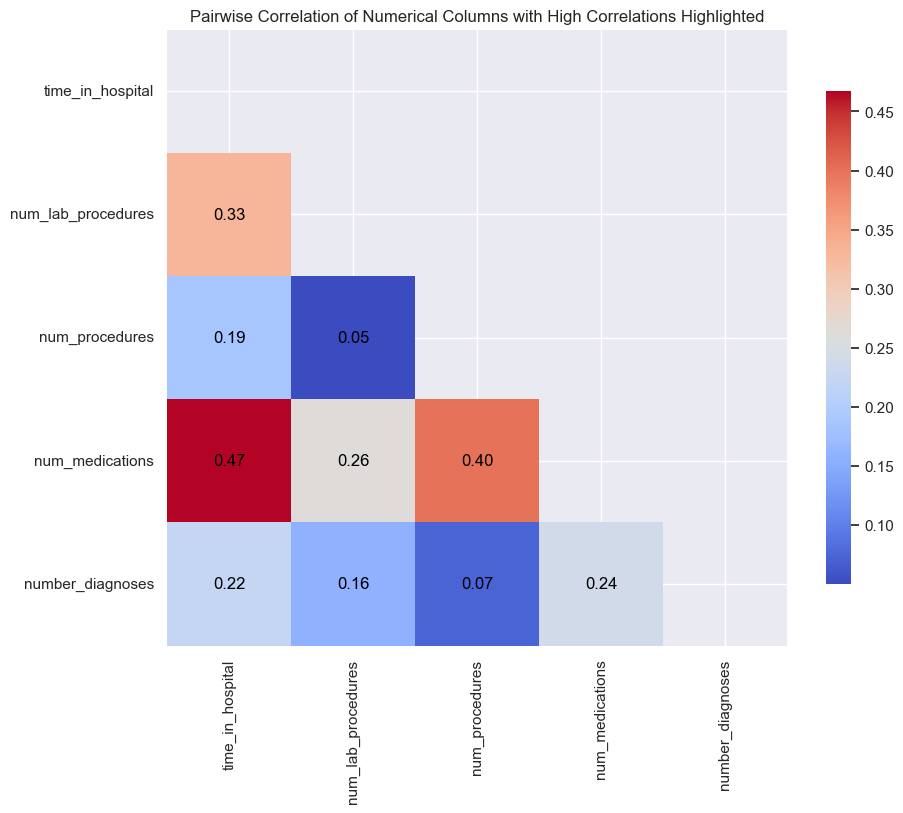

In [23]:
# Calculate correlation matrix
import numpy as np
import seaborn as sns
correlation_matrix = diabete[selected_columns].corr() # method = 'spearman' if outliners

# Mask the upper triangle and the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix with custom annotations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', mask=mask, cbar_kws={'shrink': .8})

# Custom function to annotate the heatmap
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if not mask[i, j]:
            plt.text(j + 0.5, i + 0.5, f'{correlation_matrix.iloc[i, j]:.2f}',
                     ha='center', va='center', color='black')
            
# Highlight cells with high correlation
threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=3))

plt.title('Pairwise Correlation of Numerical Columns with High Correlations Highlighted')
plt.show()

None of the pair has corr over 0.5, we can conclude there are seems no multicolinearity in the dataset.

### 1.5 Transform categorical data

There are some categorical data that have numerical input, we need to transform it to correct format for further analysis and features selection. These include:
* discharge_disposition_id
* admission_type_id
* admission_source_id

**Discharge disposition ID** tells us where the patient went after hospitalization. Since we need to evaluate the readmission rate after discharged so we keep the Id related to 'discharged or transfer' and those correspond to decease or hospice will be removed.

In [24]:
# Create a dictionary for mapping discharge disposition IDs
map_discharge = {
    1: "Discharged or Transferred",
    29: "Discharged or Transferred",
    27: "Discharged or Transferred",
    23: "Discharged or Transferred",
    24: "Discharged or Transferred",
    22: "Discharged or Transferred",
    2: "Discharged or Transferred",
    30: "Discharged or Transferred",
    5: "Discharged or Transferred",
    8: "Discharged or Transferred",
    6: "Discharged or Transferred",
    4: "Discharged or Transferred",
    3: "Discharged or Transferred",
    15: "Discharged or Transferred",
    16: "Discharged or Transferred",
    28: "Discharged or Transferred",
    17: "Discharged or Transferred",
    10: "Discharged or Transferred",
    18: "No info",
    25: "No info",
    26: "No info",
    11: "Deceased/ Hospice/ Inpatient",
    9: "Deceased/ Hospice/ Inpatient",
    19: "Deceased/ Hospice/ Inpatient",
    20: "Deceased/ Hospice/ Inpatient",
    21: "Deceased/ Hospice/ Inpatient",
    13: "Deceased/ Hospice/ Inpatient",
    14: "Deceased/ Hospice/ Inpatient",
    7: "Deceased/ Hospice/ Inpatient",
    12: "Deceased/ Hospice/ Inpatient"
}

# Replace values in the discharge_disposition_id column
diabete["discharge_disposition_id"] = diabete["discharge_disposition_id"].replace(map_discharge)

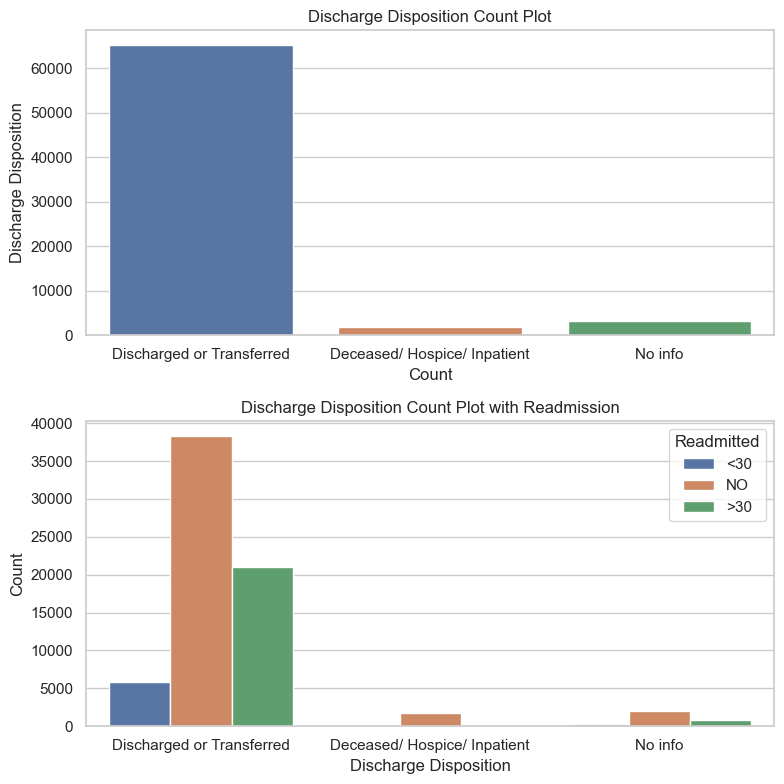

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn plots
sns.set_style("whitegrid")

# Create a figure and axes for the plots
fig, axs = plt.subplots(2,1, figsize=(8,8))

# Plot the first count plot
sns.countplot(x="discharge_disposition_id", orient="h", data=diabete, ax=axs[0])
axs[0].set_title("Discharge Disposition Count Plot")
axs[0].set_xlabel("Count")
axs[0].set_ylabel("Discharge Disposition")

# Plot the second count plot with hue
sns.countplot(x="discharge_disposition_id", hue="readmitted", data=diabete, ax=axs[1])
axs[1].set_title("Discharge Disposition Count Plot with Readmission")
axs[1].set_xlabel("Discharge Disposition")
axs[1].set_ylabel("Count")
axs[1].legend(title="Readmitted", loc="upper right")

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


It make sense that we should focus on the group that has been discharged and or transferred to evaluate the likelihood they will be re-admitted again. Thus, we can remove other values from the dataset.

In [26]:
# Drop rows with "Deceased/ Hospice/ Inpatient" and "No info" in discharge_disposition_id
diabete = diabete[~diabete["discharge_disposition_id"].isin(["Deceased/ Hospice/ Inpatient", "No info"])]

# Reset the index
diabete.reset_index(drop=True, inplace=True)

#Drop column discharge_disposition_id as all values now indicates that the patient has been discarded and or transferred
diabete.drop("discharge_disposition_id", axis=1, inplace=True)

**Admission type id** require mapping and grouping altogether as well.

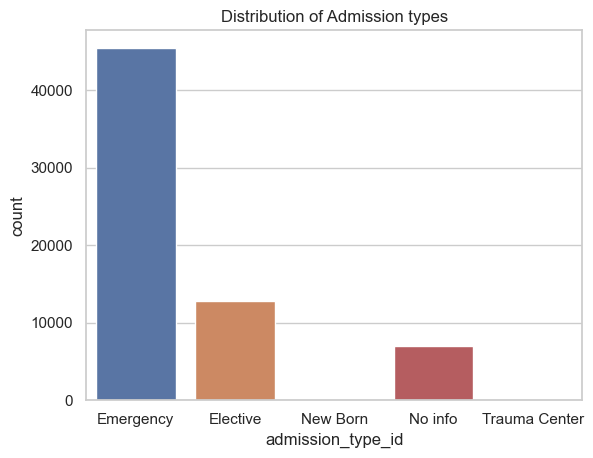

readmitted          <30    >30     NO
admission_type_id                    
Emergency          4158  14846  26457
Elective           1052   3559   8201
New Born              1      2      6
No info             683   2653   3639
Trauma Center         0      0     18


In [27]:
# Create a dictionary for mapping discharge disposition IDs
map_ad_id = {
    1.0:"Emergency",
    2.0: "Emergency",
    3.0: "Elective",
    4.0: "New Born",
    5.0: "No info",
    6.0: "No info",
    7.0: "Trauma Center",
    8.0: "No info"
}

# Replace values in the discharge_disposition_id column
diabete["admission_type_id"] = diabete["admission_type_id"].replace(map_ad_id)

# Plot
sns.countplot(x = "admission_type_id", data = diabete)
plt.title("Distribution of Admission types")
plt.show()
print(pd.crosstab(diabete['admission_type_id'], diabete['readmitted']))

**Observation**: when there is no info the ratio of being readmitted is likely 50-50, so that might be valueable to keep this column later.

**Admission source ID** also required to map with their description. There are 3 main groups I will do: Referral/ Transferred, Emergency (highest factor), Others, and No info (for null and n/a value)

In [28]:
pd.crosstab(diabete['admission_type_id'], diabete['admission_source_id'])

admission_source_id,1,2,3,4,5,6,7,8,9,10,11,13,14,17,20,22,25
admission_type_id,,,,,,,,,,,,,,,,,
Emergency,7528,523,22,1506,372,1593,33171,9,84,7,1,1,1,518,123,0,2
Elective,11193,274,44,590,63,57,545,0,2,0,0,0,0,10,30,4,0
New Born,2,0,0,4,0,0,2,0,0,0,0,0,1,0,0,0,0
No info,1674,36,3,33,13,5,1238,1,0,0,0,0,0,3972,0,0,0
Trauma Center,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0


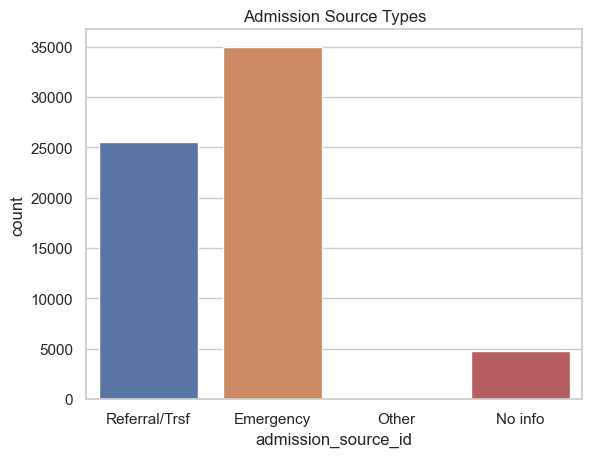

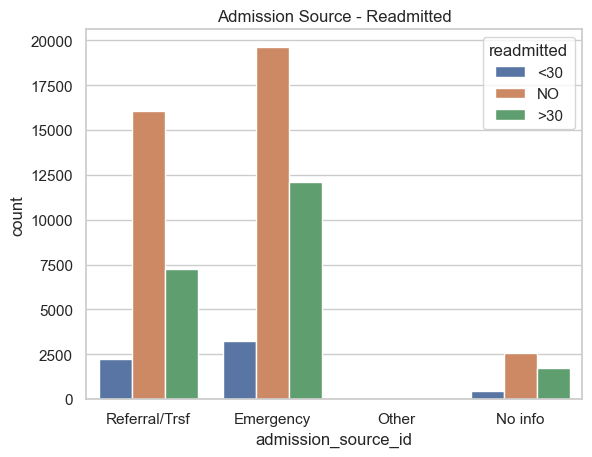

Emergency        34974
Referral/Trsf    25542
No info           4739
Other               20
Name: admission_source_id, dtype: int64


In [29]:
map_ad_source= {1:"Referral/Trsf",2:"Referral/Trsf",3:"Referral/Trsf",
              4:"Referral/Trsf",5:"Referral/Trsf",6:"Referral/Trsf",
              7:"Emergency",
              8:"Other",
              9:"No info",10:"Referral/Trsf",14:"Other",13:"Other",11:"Other",
              17:"No info",20: "No info",
              22:"Other",25:"Other",
}
diabete.admission_source_id = diabete.admission_source_id.replace(map_ad_source)

sns.countplot(x = "admission_source_id", data = diabete)
plt.title("Admission Source Types")
plt.show()

sns.countplot(x = "admission_source_id", hue = "readmitted", data = diabete)
plt.title("Admission Source - Readmitted")
plt.show()


print(diabete.admission_source_id.value_counts())

### 1.6 Remove the medications that was not distributed popularly to patient

In [30]:
diabete.columns

Index(['race', 'gender', 'age', 'admission_type_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [31]:
columns_to_count = ['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

# Create an empty DataFrame to store the counts
counts_df = pd.DataFrame(columns=['No', 'Steady', 'Up', 'Down', 'Total usage'], index=columns_to_count)

# Iterate over columns and calculate counts
for column in columns_to_count:
    counts = diabete[column].value_counts()
    counts_df.loc[column] = [counts.get('No', 0), counts.get('Steady', 0),counts.get('Up', 0), counts.get('Down', 0),sum(counts)-counts.get('No', 0)]

print(counts_df.sort_values(by='Total usage', ascending=False))
counts_df.shape

                             No Steady    Up  Down Total usage
insulin                   31305  20505  6487  6978       33970
metformin                 51334  12783   759   399       13941
glipizide                 56718   7671   536   350        8557
glyburide                 58309   6052   551   363        6966
pioglitazone              60226   4803   173    73        5049
rosiglitazone             60852   4233   123    67        4423
glimepiride               61705   3231   207   132        3570
repaglinide               64384    798    68    25         891
glyburide-metformin       64786    478     7     4         489
nateglinide               64792    459    16     8         483
acarbose                  65099    168     8     0         176
chlorpropamide            65223     48     3     1          52
tolazamide                65251     24     0     0          24
miglitol                  65256     17     1     1          19
tolbutamide               65258     17     0     0     

(23, 5)

Some medications are not distributed to patients at all hence we can remove those features.

In [32]:
diabete.drop(columns = ['examide','citoglipton','glimepiride-pioglitazone'],axis=1,inplace=True)

### 1.7 Interprete Diagnosis code

For easier understading and analyze the result, I will transform ID of the diagnosis to be one of 9 disease categories. The pulication using this dataset also apply the same method to inprete the meaning of the columns.

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def map_diagnosis(data, cols):
    for col in cols:
        # Replace codes starting with 'V' or 'E' with -1
        data[col] = data[col].astype(str)  # Ensure the column is treated as strings
        data.loc[data[col].str.contains("V", na=False) | data[col].str.contains("E", na=False), col] = -1

        # Convert to float after handling 'V' and 'E' codes
        data[col] = data[col].astype(np.float16)

    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Musculoskeletal"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"

        # Fill the remaining with 'Other'
        data["temp_diag"] = data["temp_diag"].fillna("Other")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data

# Assuming diabete DataFrame is already loaded
diabete = map_diagnosis(diabete, ["diag_1", "diag_2", "diag_3"])

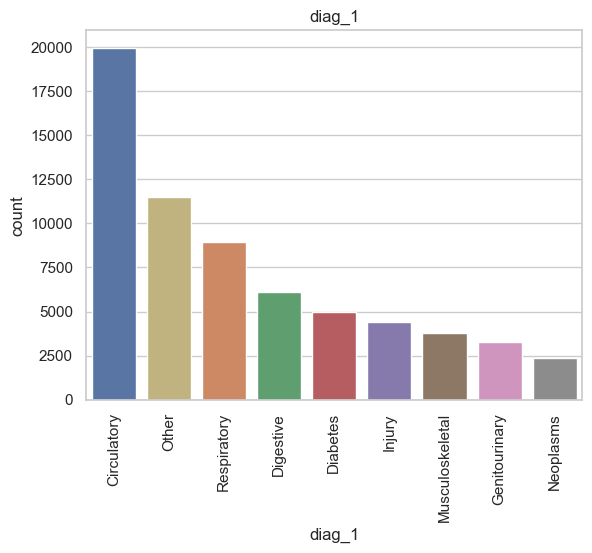

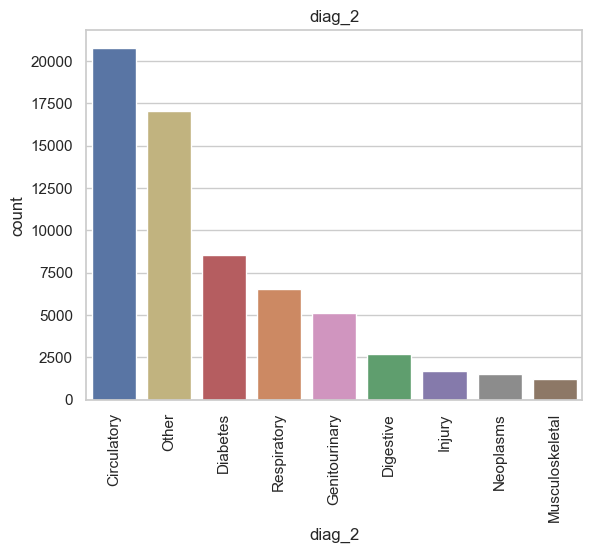

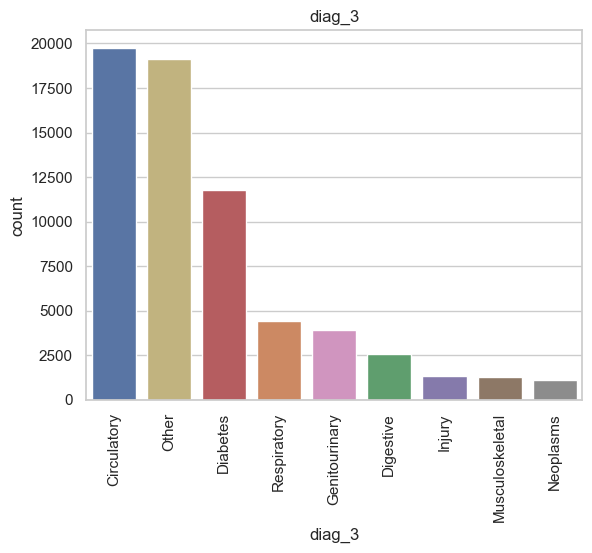

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the default Seaborn color palette
default_palette = sns.color_palette()

# Define a dictionary to map each category to a color
color_palette = {}
categories = ['Circulatory', 'Respiratory', 'Digestive', 'Diabetes', 'Injury', 'Musculoskeletal', 'Genitourinary', 'Neoplasms', 'Other']
for i, category in enumerate(categories):
    color_palette[category] = default_palette[i % len(default_palette)]

def plot_diags(col, data):
    sns.countplot(x=col, data=data, order=data[f"{col}"].value_counts().index, palette=color_palette)
    plt.xticks(rotation=90)
    plt.title(col)
    plt.show()

diag_cols = ["diag_1", "diag_2", "diag_3"]

for diag in diag_cols:
    plot_diags(diag, diabete)


Majority results show Circulatory from all three diagnosis, follows by Respiratory and Diabetes.

## 2. Explore data

### 2.1 Handling imbalance data

Readmitted has 3 values and more than 50% of that belongs to "No", so to fix the imbalance of the data, we merge 2 groups of "readmit less than 30 days" and "readmit more than 30 days" to be 1.

0    38321
1    26954
Name: readmitted, dtype: int64


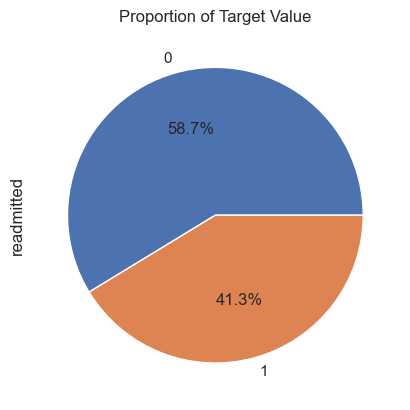

In [35]:
diabete = diabete.replace({"NO":0,
                         "<30":1,
                         ">30":1})

print(diabete.readmitted.value_counts())

# Pie chart
diabete.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

Data is balanced between the chance patient got readmitted to the hospital.

### 2.2 Patent Demographic and the relation with readmittance race

Noticing some values called 'Unknown/ Invalid' so we can remove those observations due to small number.

In [36]:
diabete['gender'].value_counts()

Female             34856
Male               30416
Unknown/Invalid        3
Name: gender, dtype: int64

In [37]:
diabete.drop(diabete[diabete['gender'] == 'Unknown/Invalid'].index, inplace=True)

object
int64
[1 0]


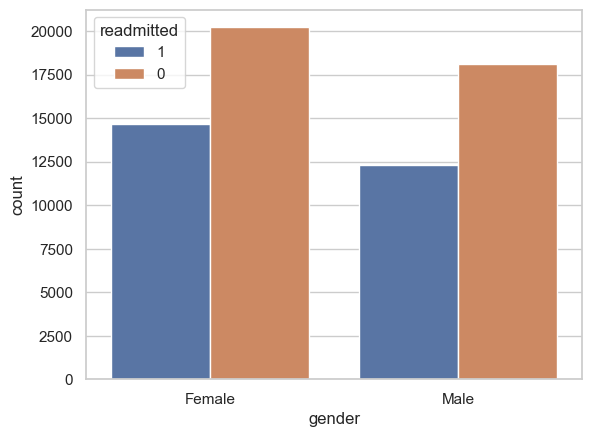

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the data types
print(diabete['gender'].dtype)  # Should be object or string
print(diabete['readmitted'].dtype)  # Should be object or string

# Inspect unique values
print(diabete['readmitted'].unique())

# Convert readmitted to string if necessary
if diabete['readmitted'].dtype != 'object':
    diabete['readmitted'] = diabete['readmitted'].astype(str)

# Gender and Readmission count plot
sns.countplot(x='gender', hue='readmitted', data=diabete)
plt.show()


The ratio is relatively similar between genders.

<Axes: xlabel='age', ylabel='count'>

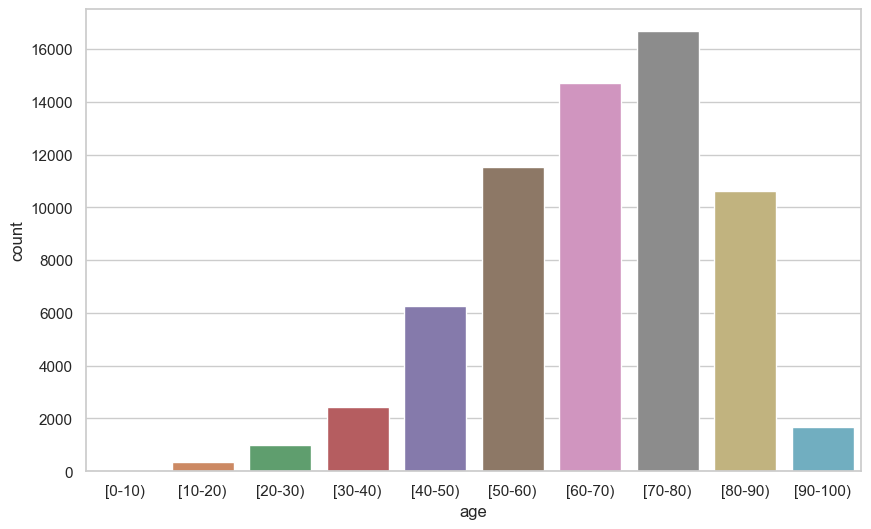

In [39]:
# Age histogram
diabete = diabete.sort_values(by='age')
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=diabete)

Majority of patients are in middle-age group or senior group where diabete is becoming a popular disease.

<Axes: xlabel='age', ylabel='count'>

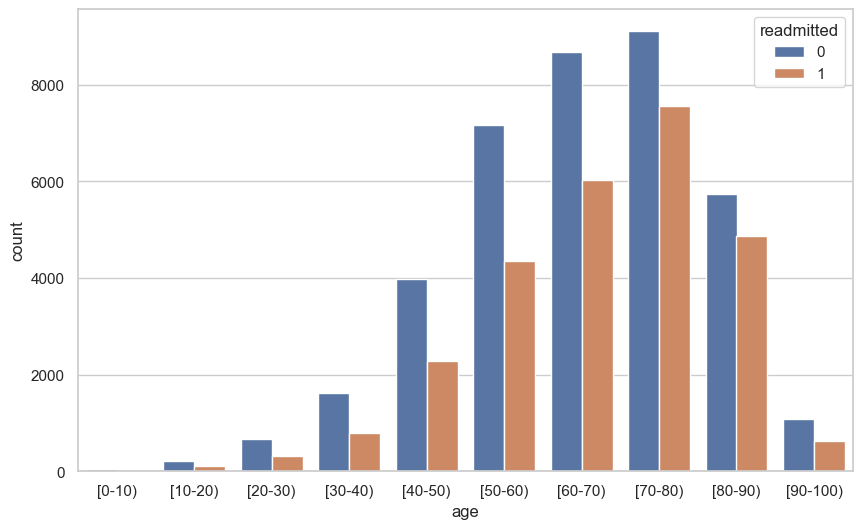

In [40]:
# Age group and Readmission count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='readmitted', data=diabete)

<Axes: xlabel='age', ylabel='count'>

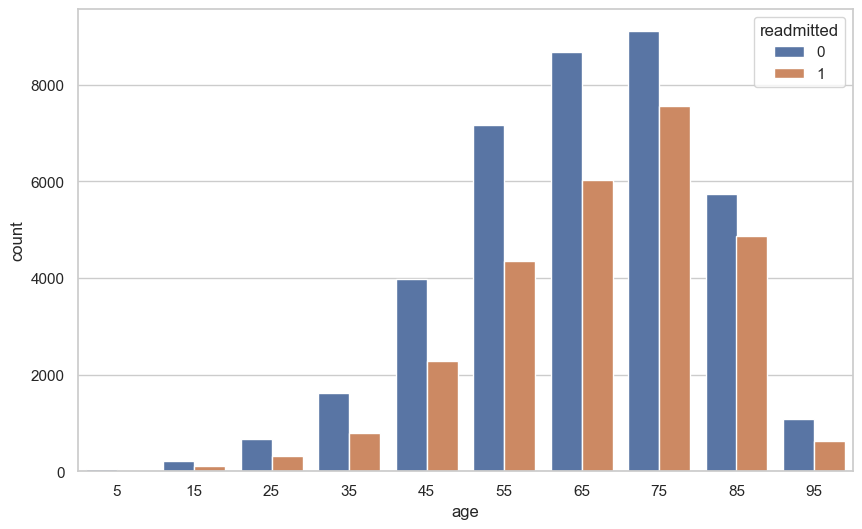

In [41]:
# Convert age ranges to midpoint
diabete['age'] = diabete['age'].apply(lambda x: int(x.split('[')[-1].split('-')[0]) + 5)
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='readmitted', data=diabete)

# II. Features Selection using PCA and SHAPRFECV

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, classification_report

## 1. Decide appropriate number of components

In [43]:
# Split the data into features and target variable
X_train, X_test, y_train, y_test = train_test_split(diabete.drop('readmitted',axis=1),
                                                    diabete['readmitted'],
                                                    test_size=0.30,
                                                    random_state=101)

In [44]:
# Separate Numerical and Categorical
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train[num_cols])

Iterate over different numbers of component to have better view before making any decision.

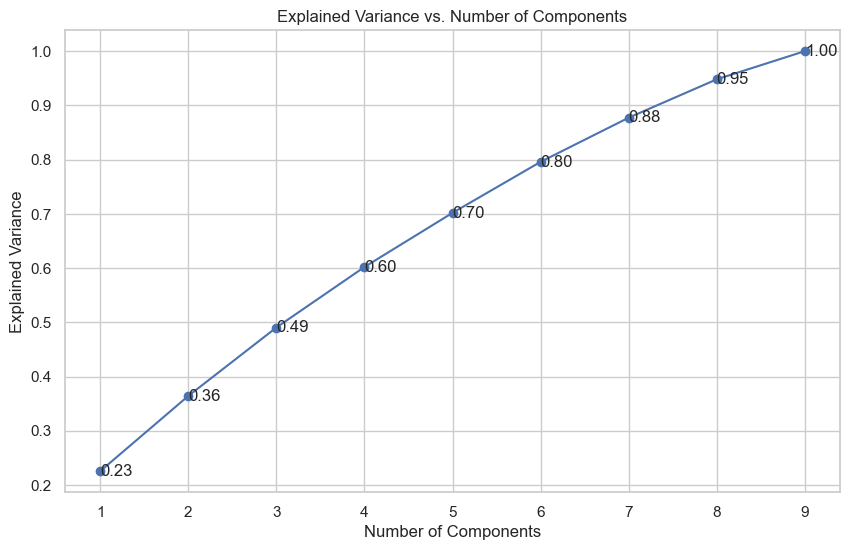

In [45]:
explained_variances = []
num_components = []
for n_components in range(1, len(num_cols)+1):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    explained_variances.append(sum(pca.explained_variance_ratio_))
    num_components.append(n_components)

# Plot the number of components vs. explained variance
plt.figure(figsize=(10, 6))
plt.plot(num_components, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components')

# Display the explained variance values next to each dot
for i, (n, ev) in enumerate(zip(num_components, explained_variances)):
    plt.text(n, ev, f'{ev:.2f}', ha='left', va='center')

plt.show()


In [46]:
df_explained_variance = pd.DataFrame({
    'Number of Components': num_components,
    'Explained Variance': explained_variances
})

# Sort the DataFrame by 'Number of Components' in descending order
df_explained_variance = df_explained_variance.sort_values(by='Number of Components', ascending=False).reset_index(drop=True)

# Calculate the percentage change in explained variance
df_explained_variance['% Change'] = df_explained_variance['Explained Variance'].pct_change() * 100

# Round the values to 2 decimal places
df_explained_variance = df_explained_variance.round(3)

# Display the DataFrame
print(df_explained_variance)

   Number of Components  Explained Variance  % Change
0                     9               1.000       NaN
1                     8               0.948    -5.194
2                     7               0.877    -7.467
3                     6               0.796    -9.281
4                     5               0.702   -11.821
5                     4               0.602   -14.229
6                     3               0.490   -18.542
7                     2               0.364   -25.732
8                     1               0.225   -38.100


In [47]:
pca = PCA(0.9)
X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)
print(pca.n_components_)

[0.22540678 0.13873776 0.12616864 0.11160485 0.09985187 0.09408011
 0.08141607 0.07079002]
8


If we set target is 95%, PCA will return with all 8 features, means we cannot reduce any features. In the decision of number of component, we take into consideration that it is related to people health, It would be best if we can try to be as most accurate as possible. However, we should not take all features so the maximum we can choose is 7 components to get closest to 95%.
Additionally, when check pct change, by reducing just 1 components from 8 to 7, the % of explained variance reducing the smallest values.

## 2. Apply PCA with Random Forest classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline for the numerical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9))  # As decided before 94% with 7 features
])

# Create a ColumnTransformer to apply transformations
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

# Combine preprocessor with Random Forest classifier
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = model_pipeline.predict(X_test)


## 3. Apply ShapRFECV with Random Forest classifier

In previous ShapRFECV I selected 10 features base on ShapRFECV

In [49]:
shap_features = X_train[['age', 
                 'number_outpatient',
                 'number_emergency',
                 'number_inpatient',
                 'diag_1',
                 'diag_2',
                 'diag_3',
                 'number_diagnoses',
                 'insulin',
                 'diabetesMed']]
shap_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45690 entries, 10040 to 25034
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45690 non-null  int64 
 1   number_outpatient  45690 non-null  int64 
 2   number_emergency   45690 non-null  int64 
 3   number_inpatient   45690 non-null  int64 
 4   diag_1             45690 non-null  object
 5   diag_2             45690 non-null  object
 6   diag_3             45690 non-null  object
 7   number_diagnoses   45690 non-null  int64 
 8   insulin            45690 non-null  object
 9   diabetesMed        45690 non-null  object
dtypes: int64(5), object(5)
memory usage: 3.8+ MB


In [50]:
s_num_cols = ['number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
s_cat_cols = ['age', 'diag_1', 'diag_2', 'diag_3', 'insulin', 'diabetesMed']

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Define categorical and numerical columns
s_num_cols = ['number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
s_cat_cols = ['diag_1', 'diag_2', 'diag_3', 'insulin', 'diabetesMed']

# Create a ColumnTransformer to apply transformations
preprocessor = ColumnTransformer([
    ('num', 'passthrough', s_num_cols),  # Numerical columns
    ('cat', OneHotEncoder(drop='first', handle_unknown='error'), s_cat_cols)   # One hot encoder categorical
])

# Combine preprocessor with RandomForestClassifier
model_pipeline_s = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
model_pipeline_s.fit(X_train, y_train)

# Predict on the test set
y_pred_s = model_pipeline_s.predict(X_test)


In [52]:
 from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Accuracy score
accuracy_pca_rf = accuracy_score(y_test, y_pred)
accuracy_shap_rf = accuracy_score(y_test, y_pred_s)

# F1 Score
f1_score_pca_rf = f1_score(y_test, y_pred,pos_label="0")
f1_score_shap_rf = f1_score(y_test, y_pred_s, pos_label="0")

# Recall
recall_pca_rf = recall_score(y_test, y_pred, pos_label="0")
recall_shap_rf = recall_score(y_test, y_pred_s, pos_label="0")

# Precision
precision_pca_rf = precision_score(y_test, y_pred, pos_label="0")
precision_shap_rf = precision_score(y_test, y_pred_s, pos_label="0")

comparison = {
    'Metric': ['Accuracy', 'F1 Score', 'Recall', 'Precision'],
    'Model PCA': [accuracy_pca_rf, f1_score_pca_rf, recall_pca_rf, precision_pca_rf],
    'Model SHAP': [accuracy_shap_rf, f1_score_shap_rf, recall_shap_rf, precision_shap_rf],
}

df = pd.DataFrame(comparison)
print(df)


      Metric  Model PCA  Model SHAP
0   Accuracy   0.621183    0.584976
1   F1 Score   0.719419    0.678635
2     Recall   0.823805    0.743330
3  Precision   0.638512    0.624300


**Observation**

Model use Shap selected features get significant lower in all performance metrics. To crosscheck the result, I would try with another type of classifier.

In [53]:
print('test')

test


## 4. Re-run with LogisticRegression on both PCA and ShapRFECV

**PCA on Logistic Regression**

In [54]:
# Create a pipeline for the numerical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9))  # As decided before 94% with 7 features
])

# Create a ColumnTransformer to apply transformations
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, num_cols),
    ('cat', OneHotEncoder(drop='first',handle_unknown='ignore'), cat_cols)
])

# Combine preprocessor with logistic regression
model_pipeline_pl = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=800, solver='lbfgs'))
])

# Fit the model
model_pipeline_pl.fit(X_train, y_train)

# Predict on the test set
y_pred_pl = model_pipeline_pl.predict(X_test)

**ShapRFECV on Logistic regression**

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define categorical and numerical columns
s_num_cols = ['number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
s_cat_cols = ['diag_1', 'diag_2', 'diag_3', 'insulin', 'diabetesMed']

# Create a ColumnTransformer to apply transformations
preprocessor = ColumnTransformer([
    ('num', 'passthrough', s_num_cols),  # Numerical columns
    ('cat', OneHotEncoder(drop='first', handle_unknown='error'), s_cat_cols)   # One hot encoder categorical
])

# Combine preprocessor with logistic regression
model_pipeline_sl = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=800, solver='lbfgs'))
])

# Fit the model
model_pipeline_sl.fit(X_train, y_train)

# Predict on the test set
y_pred_sl = model_pipeline_sl.predict(X_test)

In [56]:
 from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Accuracy score
accuracy_pca_logit = accuracy_score(y_test, y_pred_pl)
accuracy_shap_logit = accuracy_score(y_test, y_pred_sl)

# F1 Score
f1_score_pca_logit = f1_score(y_test, y_pred_pl,pos_label="0")
f1_score_shap_logit = f1_score(y_test, y_pred_sl, pos_label="0")

# Recall
recall_pca_logit = recall_score(y_test, y_pred_pl, pos_label="0")
recall_shap_logit = recall_score(y_test, y_pred_sl, pos_label="0")

# Precision
precision_pca_logit = precision_score(y_test, y_pred_pl, pos_label="0")
precision_shap_logit = precision_score(y_test, y_pred_sl, pos_label="0")



In [57]:
# Create a pipeline for the numerical features
numerical_pipeline_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))  # As decided before 94% with 7 features
])

# Create a ColumnTransformer to apply transformations
preprocessor2 = ColumnTransformer([
    ('num', numerical_pipeline_2, num_cols),
    ('cat', OneHotEncoder(drop='first',handle_unknown='ignore'), cat_cols)
])

# Combine preprocessor with logistic regression
model_pipeline2 = Pipeline([
    ('preprocessor', preprocessor2),
    ('classifier', LogisticRegression(max_iter=800, solver='lbfgs'))
])

# Fit the model
model_pipeline2.fit(X_train, y_train)

# Predict on the test set
y_pred2 = model_pipeline2.predict(X_test)

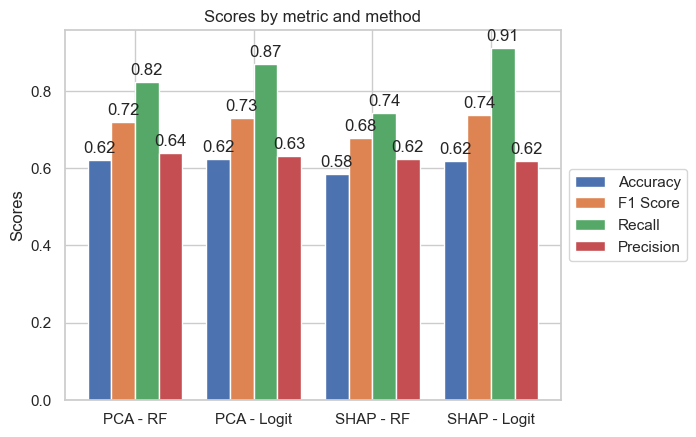

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for each combination
methods = ['PCA - RF', 'PCA - Logit', 'SHAP - RF', 'SHAP - Logit']
accuracy_values = [accuracy_pca_rf, accuracy_pca_logit, accuracy_shap_rf, accuracy_shap_logit]
f1_score_values = [f1_score_pca_rf, f1_score_pca_logit, f1_score_shap_rf, f1_score_shap_logit]
recall_values = [recall_pca_rf, recall_pca_logit, recall_shap_rf, recall_shap_logit]
precision_values = [precision_pca_rf, precision_pca_logit, precision_shap_rf, precision_shap_logit]

x = np.arange(len(methods))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, accuracy_values, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, f1_score_values, width, label='F1 Score')
rects3 = ax.bar(x + 0.5*width, recall_values, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, precision_values, width, label='Precision')

# Add numbers on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by metric and method')
ax.set_xticks(x)
ax.set_xticklabels(methods)

# Move legend outside of the chart
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


**Observation**

* Model using selected feature from SHAP but has RandomForest Classifer has the **lowest** performance among those 4
* When use Shap features with Logistic regression features all of performance metrics improved significanly.
* All metrics are quite similar between all models, except for Recall. This is also the metrics that we can prioritize, as higher recal indicating higher correctly predicting positive cases (Class 1 where people readmitted) so researcher can make a suitable plan for medical interventon at the early stage.

## 5. Approach comparison

**PCA method**

  **Pros:**

  * Fast computation.
  * Useful when the data has multicolinearity. It help reduce the impact of multicollinearity and therefore can help to reduce number of features significantly.


  **Cons:**

  * If data like this dataset has no multicollinearity, PCA could not prove any usefulness as it return with almost the same number of features if we want to capture high number of variances.
  * It is also hard to interprete since the original features has been transformed to components. We need to reverse back to be able to interprete the results.
  * Does not take mixed data togethers but numerical only so the categorical features require another technique to reduce its dimension.


    
**ShapRFECV method**
    
  **Pros:**

  * Provide SHapfeature importance score to demonstrate the impact of each features towards the outcome
  * Automatically select the features that has most impact, which help to shorten the selection process
    
  **Cons:**

  * Time consuming
  * Important features may be eliminated from Shap calculation